In [9]:
# Deep Learning packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Machine Learning packages
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import pickle
import nltk
import re
from nltk.stem import PorterStemmer

# Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [10]:

train_data = pd.read_csv("train.txt", header=None, sep=";", names=["Comment", "Emotion"], encoding="utf-8")
# get all words length in comment
train_data['length'] = [len(x) for x in train_data['Comment']]
train_data

,Comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


In [11]:
train_data.isnull().sum()

Comment    0
Emotion    0
length     0
dtype: int64

In [12]:
train_data.duplicated().sum()

1

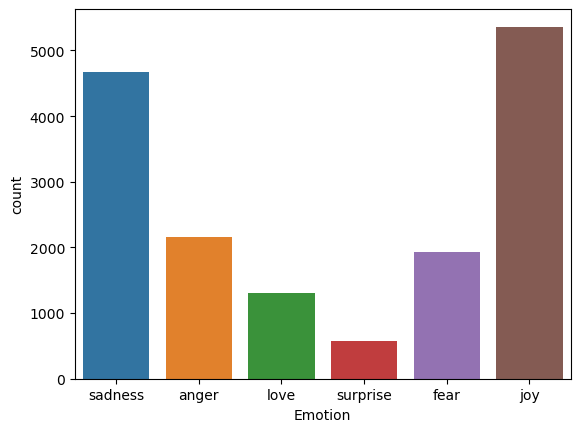

In [13]:
sns.countplot(x = train_data['Emotion'])
plt.show()

c:\Users\haseeb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


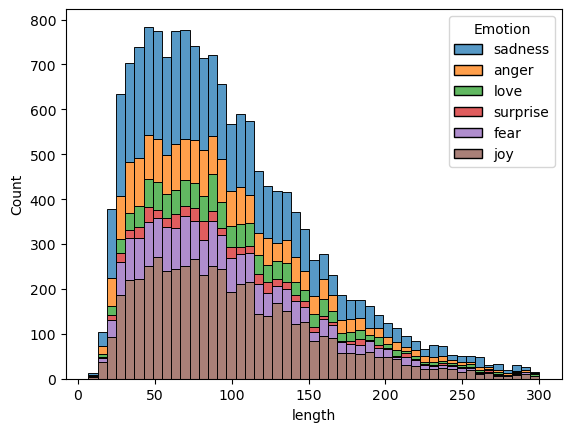

In [14]:
# data distribution
df2 = train_data.copy()
df2['length'] = [len(x) for x in df2['Comment']]

# Convert the 'length' column to a numpy array
length_values = df2['length'].values

# Use sns.histplot instead of sns.kdeplot for simplicity
sns.histplot(data=df2, x='length', hue='Emotion', multiple='stack')

plt.show()

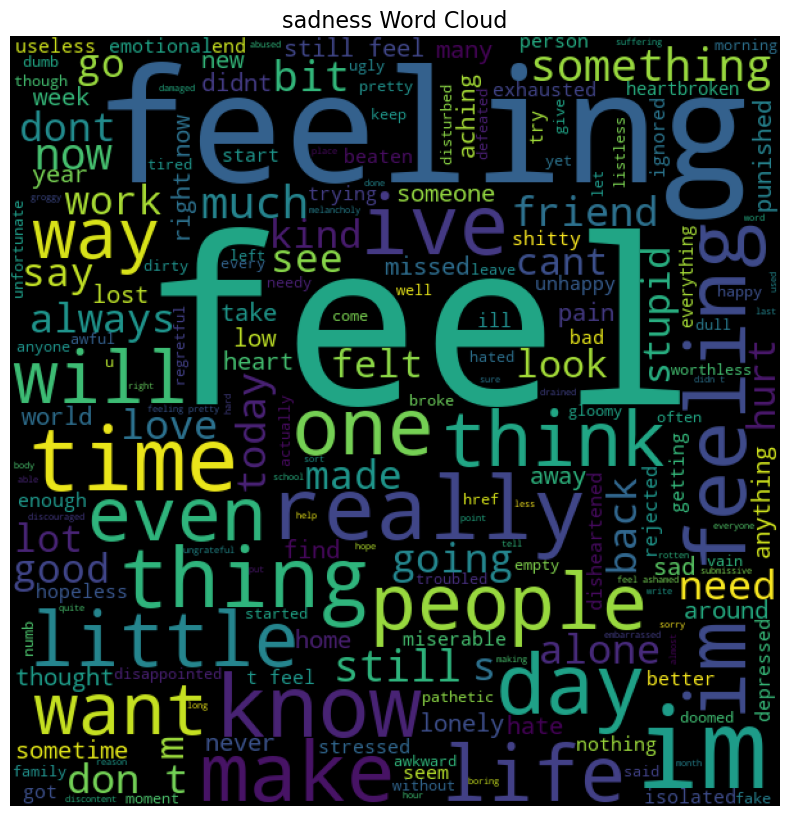

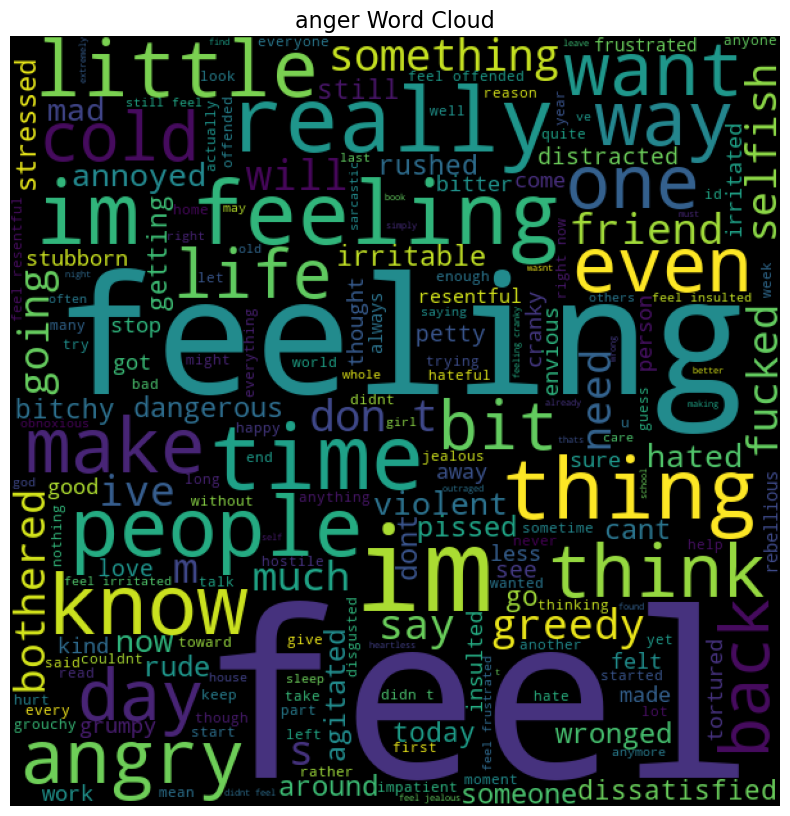

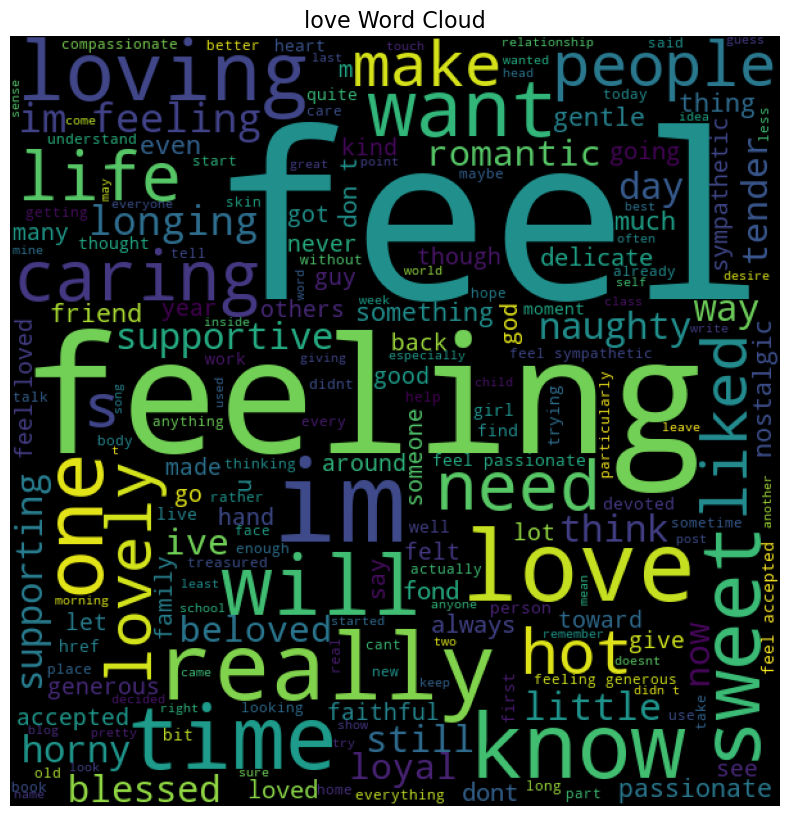

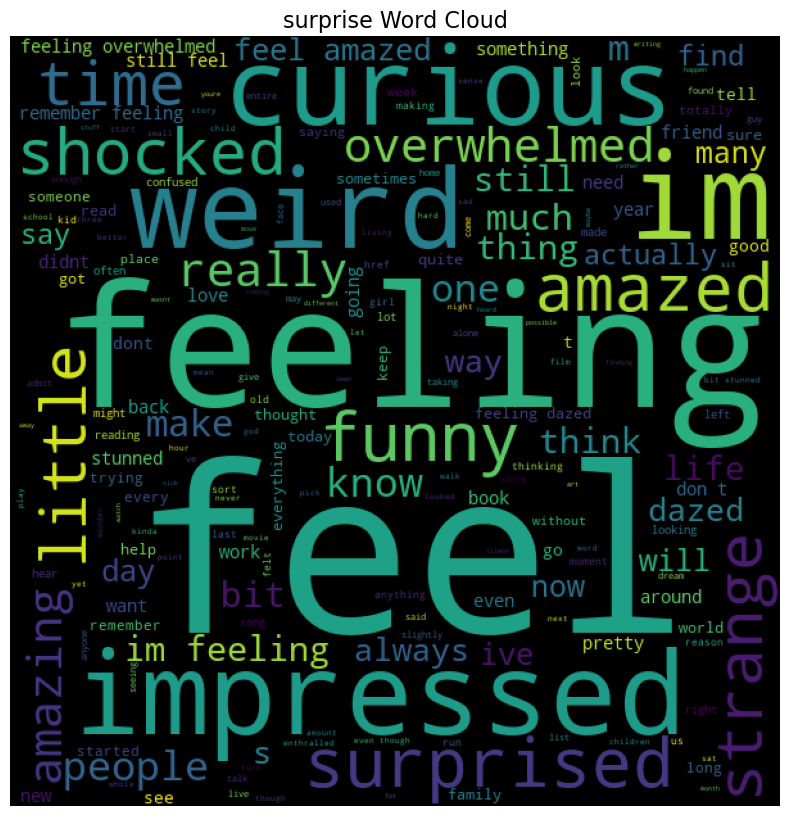

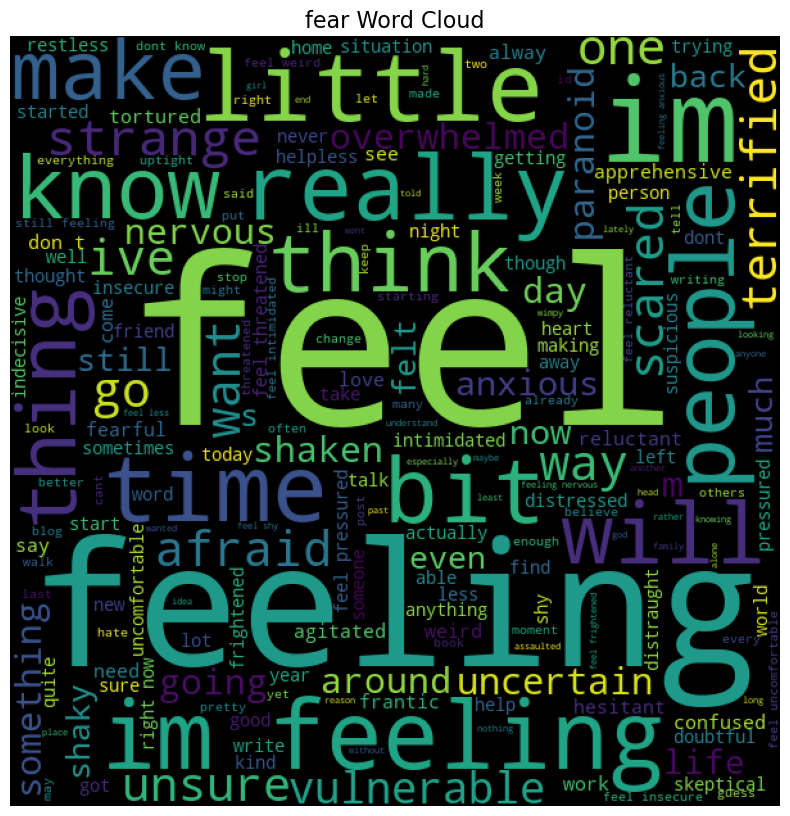

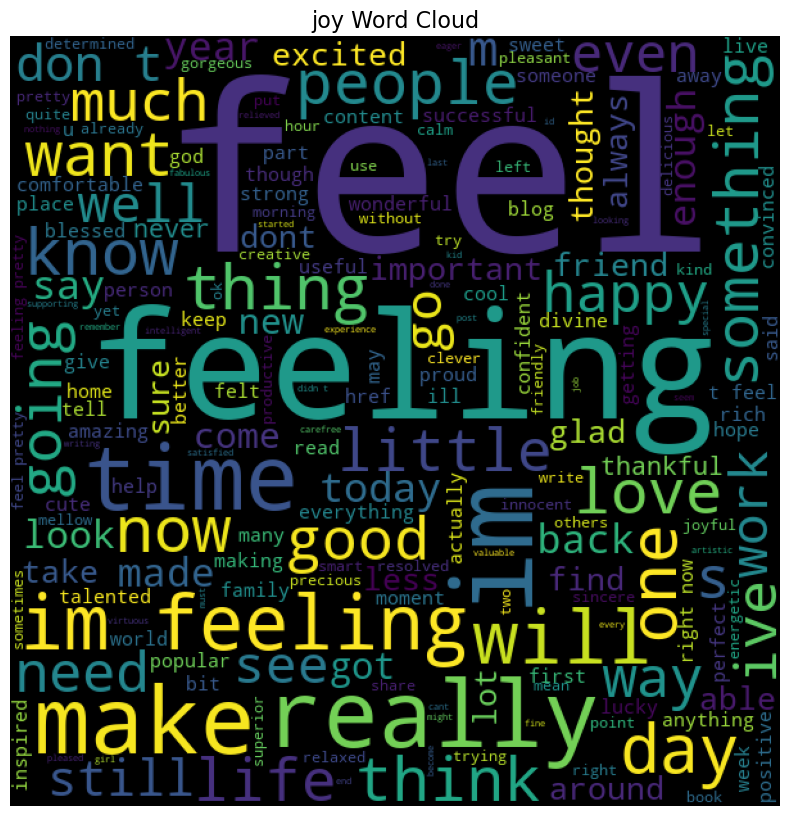

In [8]:
# Words cloud for each emotions
def words_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.title(df+' Word Cloud', size = 16)
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
emotions_list = train_data['Emotion'].unique()
for emotion in emotions_list:
    text = ' '.join([sentence for sentence in train_data.loc[train_data['Emotion'] == emotion,'Comment']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emotion)

In [9]:
lb=LabelEncoder()
train_data["Emotion_Encoded"]=lb.fit_transform(train_data['Emotion'])
train_data

,Comment,Emotion,length,Emotion_Encoded
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4
15996,i am now turning and i feel pathetic that i am...,sadness,102,4
15997,i feel strong and good overall,joy,30,2
15998,i feel like this was such a rude comment and i...,anger,59,0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [11]:
df = train_data.copy() 
df

,Comment,Emotion,length,Emotion_Encoded
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4
15996,i am now turning and i feel pathetic that i am...,sadness,102,4
15997,i feel strong and good overall,joy,30,2
15998,i feel like this was such a rude comment and i...,anger,59,0


In [12]:
stopwords=set(nltk.corpus.stopwords.words("english"))

def clean_text(text):
    stemmer=PorterStemmer()
    text=re.sub('[^a-zA-Z]',' ',text)
    text=text.lower()
    text=text.split()
    text=[stemmer.stem(word) for word in text if word not in stopwords]
    return " ".join(text)

clean_text("Hello My Name I am going to doing hated gone")

df['Cleaned_Comment']=df['Comment'].apply(clean_text)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Comment'],df['Emotion_Encoded'],test_size=0.2,random_state=42)

In [14]:
tfidf_vectorizer=TfidfVectorizer()

X_train_tfidf=tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf=tfidf_vectorizer.transform(X_test)

In [24]:
# Multi-class classification using different algorithms
classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
}

for name, clf in classifiers.items():
    print(f"\n===== {name} =====")
    clf.fit(X_train_tfidf, y_train)
    y_pred_tfidf = clf.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    print(f"\nAccuracy using TF-IDF: {accuracy_tfidf}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_tfidf))


===== Multinomial Naive Bayes =====

Accuracy using TF-IDF: 0.655
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.31      0.46       427
           1       0.91      0.24      0.38       397
           2       0.58      0.98      0.73      1021
           3       1.00      0.03      0.06       296
           4       0.70      0.91      0.79       946
           5       1.00      0.01      0.02       113

    accuracy                           0.66      3200
   macro avg       0.85      0.41      0.41      3200
weighted avg       0.76      0.66      0.58      3200


===== Logistic Regression =====


c:\Users\haseeb\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Accuracy using TF-IDF: 0.829375
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       427
           1       0.84      0.73      0.78       397
           2       0.78      0.94      0.85      1021
           3       0.80      0.49      0.61       296
           4       0.88      0.92      0.90       946
           5       0.77      0.45      0.57       113

    accuracy                           0.83      3200
   macro avg       0.82      0.72      0.76      3200
weighted avg       0.83      0.83      0.82      3200


===== Random Forest =====

Accuracy using TF-IDF: 0.84875
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       427
           1       0.82      0.83      0.82       397
           2       0.85      0.90      0.87      1021
           3       0.81      0.65      0.72       296
           4       0.91      0.88      0.90     

In [25]:
# selecting model
rf = RandomForestClassifier()
rf=rf.fit(X_train_tfidf, y_train)


In [34]:
def prediction(input_text):
    cleaned_text = clean_text(input_text)
    input_vectorized = tfidf_vectorizer.transform([cleaned_text])

    # Predict emotion
    predicted_label = rf.predict(input_vectorized)[0]
    predicted_emotion = lb.inverse_transform([predicted_label])[0]

    # Get the probability of the predicted class
    label_probability = np.max(rf.predict_proba(input_vectorized))

    return predicted_emotion, label_probability

# Example usage 
sentences = [
    "i didnt feel humiliated",
    "i feel strong and good overall",
    "im grabbing a minute to post i feel greedy wrong",
    "He was speechless when he found out he was accepted to this new job",
    "This is outrageous, how can you talk like that?",
    "I feel like im all alone in this world",
    "He is really sweet and caring",
    "You made me very crazy",
    "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
    "i am feeling grouchy",
    "He hates you",
]

for sent in sentences:
    print(sent)
    predict_emotion, label = prediction(sent)
    print("Prediction:", predict_emotion)
    print("Label Probability:", label)
    print("================================================================")




i didnt feel humiliated
Prediction: sadness
Label Probability: 0.9
i feel strong and good overall
Prediction: joy
Label Probability: 0.96
im grabbing a minute to post i feel greedy wrong
Prediction: anger
Label Probability: 0.98
He was speechless when he found out he was accepted to this new job
Prediction: joy
Label Probability: 0.5683333333333332
This is outrageous, how can you talk like that?
Prediction: anger
Label Probability: 0.71
I feel like im all alone in this world
Prediction: sadness
Label Probability: 0.8540000000000001
He is really sweet and caring
Prediction: joy
Label Probability: 0.34333333333333327
You made me very crazy
Prediction: anger
Label Probability: 0.64
i am ever feeling nostalgic about the fireplace i will know that it is still on the property
Prediction: love
Label Probability: 0.93
i am feeling grouchy
Prediction: anger
Label Probability: 0.99
He hates you
Prediction: anger
Label Probability: 0.57


In [35]:
# save files
import pickle
pickle.dump(rf,open("Random Forest.pkl",'wb'))
pickle.dump(lb,open("label_encoder.pkl",'wb'))
pickle.dump(tfidf_vectorizer,open("tfidf_vectorizer.pkl",'wb'))


In [36]:
import sklearn
print(sklearn.__version__) # use this version in pycharm

1.2.2


## Now Applying Deep Learning Model LSTM

In [24]:
from imblearn.over_sampling import SMOTE
stopwords=set(nltk.corpus.stopwords.words("english"))


In [25]:
# Text cleaning function
def text_cleaning(df, column, vocab_size, max_len):
    stemmer = PorterStemmer()
    corpus = []

    for text in df[column]:
        text = re.sub("[^a-zA-Z]", " ", text)
        text = text.lower()
        text = text.split()
        text = [stemmer.stem(word) for word in text if word not in stopwords]
        text = " ".join(text)
        corpus.append(text)

    one_hot_word = [one_hot(input_text=word, n=vocab_size) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=max_len, padding='pre')
    return pad

# Text cleaning and encoding
x_train = text_cleaning(train_data, "Comment", vocab_size=11000, max_len=300)


In [26]:
lb=LabelEncoder()
train_data['Emotion']=lb.fit_transform(train_data['Emotion'])

In [27]:
y_train=to_categorical(train_data['Emotion'])

In [28]:
#Applying Smote 
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(x_train, y_train)


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Build and compile the model
model = Sequential()
model.add(Embedding(input_dim=11000, output_dim=150, input_length=300))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))  # Changed activation to 'relu'
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
callback = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
model.fit(X_train_resampled, Y_train_resampled, epochs=10, batch_size=64, verbose=1, callbacks=[callback])


Epoch 1/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 256s 498ms/step - accuracy: 0.2995 - loss: 1.5902
Epoch 2/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 246s 490ms/step - accuracy: 0.6210 - loss: 0.9499
Epoch 3/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 255s 506ms/step - accuracy: 0.7458 - loss: 0.6685
Epoch 4/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 255s 507ms/step - accuracy: 0.8327 - loss: 0.4620
Epoch 5/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 256s 509ms/step - accuracy: 0.8964 - loss: 0.2969
Epoch 6/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 259s 515ms/step - accuracy: 0.9350 - loss: 0.1897
Epoch 7/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 259s 514ms/step - accuracy: 0.9591 - loss: 0.1214
Epoch 8/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 261s 518ms/step - accuracy: 0.9684 - loss: 0.0936
Epoch 9/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 263s 524ms/step - accuracy: 0.9748 - loss: 0.0733
Epoch 10/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 266s 528ms/step - accuracy: 0.9784 - loss: 0.0642


In [31]:
# Text cleaning function
def sentence_cleaning(sentence):
    stemmer = PorterStemmer()
    corpus = []
    text = re.sub("[^a-zA-Z]", " ", sentence)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    text = " ".join(text)
    corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=11000) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=300, padding='pre')
    return pad

# load model and predict 
sentences = [
            "i feel strong and good overall",
            "im grabbing a minute to post i feel greedy wrong",
            "He was speechles when he found out he was accepted to this new job",
            "This is outrageous, how can you talk like that?",
            "I feel like im all alone in this world",
            "He is really sweet and caring",
            "You made me very crazy",
            "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
            "i am feeling grouchy",
            "He hates you"
            ]
for sentence in sentences:
    print(sentence)
    sentence = sentence_cleaning(sentence)
    result = lb.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(model.predict(sentence))
    print(f"{result} : {proba}\n\n")

i feel strong and good overall
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
joy : 0.9999876022338867


im grabbing a minute to post i feel greedy wrong
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
anger : 0.9999439716339111


He was speechles when he found out he was accepted to this new job
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
sadness : 0.4520246386528015


This is outrageous, how can you talk like that?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
anger : 0.9207113981246948


I feel like im all alone in this world
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
sadness : 0.9986294507980347


He is really sweet and caring
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
love : 0.6139470338821411


You made me very crazy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
anger

In [33]:
model.save('model1.h5')

# Save the LabelEncoder
with open('lb1.pkl', 'wb') as f:
    pickle.dump(lb, f)

# Save vocabulary size and max length
vocab_info = {'vocab_size': 11000, 'max_len': 300}
with open('vocab_info.pkl', 'wb') as f:
    pickle.dump(vocab_info, f)

In [1]:
# use this version
import tensorflow
import keras
print(keras.__version__)
print(tensorflow.__version__)

3.5.0
2.17.0


In [18]:
df2['Emotion'].value_counts()

Emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64